# <span style="color:navy"> Numerical Simulation Laboratory
# <span style="color:orange"> Numerical Exercises 03
### <span style="color:black"> Exercise 03.1 </span>

###### <span style=color:black>Plain vanilla option pricing </span>
This exercise's goal was to price a European-option of an asset (both a *Call* and a *Put* option), simulating the asset's price evolution as a *Geometric Brownian Motion*, following Black-Scholes theory.


The option parameter were:
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

The option price had to be computed in two different ways:  
1) By sampling directly the asset price at $t = T$  
2) By sampling the asset price step by step at $t = t_{i}$, with ${\scriptsize i =1, 2,...,100}$ (i.e. dividing the interval ${\scriptsize [0,T]}$ in *100* sub-intervals).

*1) Direct sampling*  
In this case the value of the final price is: 
$$S(T) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)T+\sigma W(T)\right]$$
where the mean $\mu = r$, and $W(t)$ is a value sampled by a Gaussian $\mathcal{N}(0,t)$.

*2) Discretized sampling*  
The recursive formula in this case is:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
        +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
where $\mu = r$, and $Z_{i}$ is a value sampled by a Gaussian $\mathcal{N}(0,1)$.

Knowing the asset price at the delivery time $T$, it is easy to compute the price for the option:  
for the *Call option* the profit at delivery time is ${\scriptsize E(T) = max\left\{0, S(T)-K\right\}}$, while for the *Put option* is ${\scriptsize E(T) = max\left\{0, K-S(T)\right\}}$.  
This means that, given the possibility to earn with a risk-free interest rate, the profit at the initial time $t = 0$ (which is the price of the option) is ${\scriptsize E(0) = E(T) e^{-rT}}$

The estimation of the final asset price and consequently of the option price has been repeated *M = 10000* times, and the mean value has been calculated with *N = 100* blocks for both the *Call* and *Put* option, with both sampling methods.  
The only difference in the code between the methods is the way of computing the final asset price as said before.

In the following picture the value of option price are shown as a function of number of blocks, each with its statistical uncertainty. It is also shown the analitic expected value of the price, calculated with Black-Scholes theory.

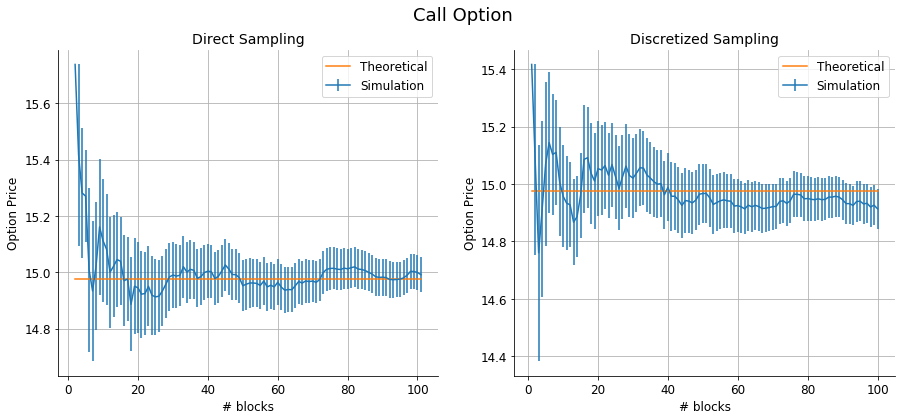

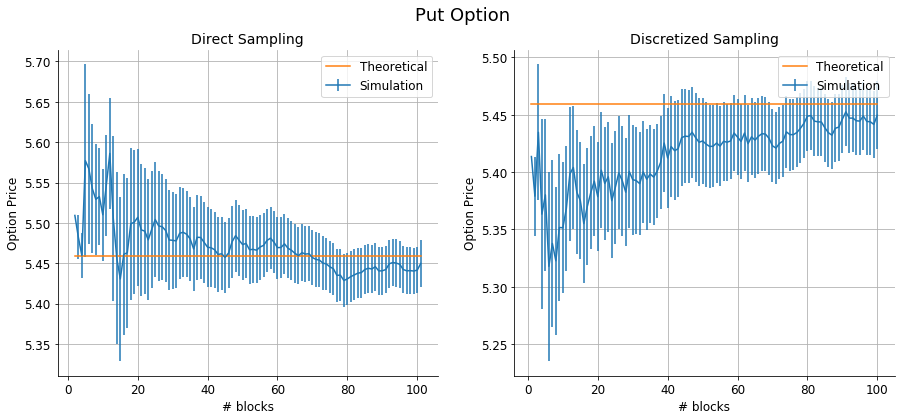

In [1]:
# figures parameters
import matplotlib as mpl
mpl.rcParams['figure.titlesize'] = 18
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['figure.subplot.wspace'] = 0.2
mpl.rcParams['figure.subplot.hspace']= 0.4

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig, axarr = plt.subplots (1 ,2, figsize=(15,6))
fig.suptitle ("Call Option")

#Call option
N, price , error = np.loadtxt ("Ex03.1/Direct_sampling.out", usecols=(0, 1, 2), delimiter='	', unpack= True)
f = np.full(N.size, 14.975790778311286)

axarr[0].errorbar (N, price, yerr=error, label='Simulation')
axarr[0].plot (N, f, label= 'Theoretical')
axarr[0].set_title ("Direct Sampling")

N, price , error = np.loadtxt ("Ex03.1/Discretized_sampling.out", usecols=(0, 1, 2), delimiter='	', unpack= True)
axarr[1].errorbar (N, price, yerr=error, label='Simulation')
axarr[1].plot (N, f, label= 'Theoretical')
axarr[1].set_title ("Discretized Sampling")

for i in range(2):
    axarr[i].set_xlabel ('# blocks')
    axarr[i].set_ylabel ('Option Price')
    axarr[i].grid(True)
    axarr[i].legend()

plt.show()

fig, axarr = plt.subplots (1 ,2, figsize=(15,6))
fig.suptitle ("Put Option")

#Put option
N, price , error = np.loadtxt ("Ex03.1/Direct_sampling.out", usecols=(0, 3, 4), delimiter='	', unpack= True)
f = np.full(N.size, 5.4595325819072364)

axarr[0].errorbar (N, price, yerr=error, label='Simulation')
axarr[0].plot (N, f, label= 'Theoretical')
axarr[0].set_title ("Direct Sampling")

N, price , error = np.loadtxt ("Ex03.1/Discretized_sampling.out", usecols=(0, 3, 4), delimiter='	', unpack= True)
axarr[1].errorbar (N, price, yerr=error, label='Simulation')
axarr[1].plot (N, f, label= 'Theoretical')
axarr[1].set_title ("Discretized Sampling")

for i in range(2):
    axarr[i].set_xlabel ('# blocks')
    axarr[i].set_ylabel ('Option Price')
    axarr[i].grid(True)
    axarr[i].legend()

plt.show()